<a href="https://colab.research.google.com/github/elifsenakuru/face_recognition1/blob/main/GenderAgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elifsenakuru","key":"1a4fc82763d4a8a2e3da1057371bd552"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                         Diabetes Dataset                                      9KB  2022-10-06 08:55:25            936         27  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset           COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11            841         26  0.9411765        
evangower/premier-league-matches-19922022                     Premier League Matches 1992-2022                     78KB  2022-10-03 02:18:33            559         24  1.0              
whenamancodes/student-performance                             Student 

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 99% 327M/331M [00:09<00:00, 26.7MB/s]
100% 331M/331M [00:09<00:00, 36.9MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
dataset_path = '/content/UTKFace'

In [ ]:
#creating lists for labels and image paths
image_paths = []
age_labels = []
gender_labels = []

In [ ]:
#appending these lists with age,gender and image path for every data
for filename in tqdm(os.listdir(dataset_path)):
  image_path = os.path.join(dataset_path, filename)
  splt = filename.split('_')
  age = int(splt[0])
  gender = int(splt[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(image_paths)

['/content/UTKFace/81_0_0_20170111222241614.jpg.chip.jpg', '/content/UTKFace/49_0_3_20170117130532515.jpg.chip.jpg', '/content/UTKFace/30_0_0_20170113133232626.jpg.chip.jpg', '/content/UTKFace/24_0_3_20170119165827320.jpg.chip.jpg', '/content/UTKFace/67_1_0_20170110120952264.jpg.chip.jpg', '/content/UTKFace/22_1_0_20170117143206386.jpg.chip.jpg', '/content/UTKFace/21_1_1_20170113005845999.jpg.chip.jpg', '/content/UTKFace/55_0_1_20170113195601362.jpg.chip.jpg', '/content/UTKFace/35_0_2_20170112215010390.jpg.chip.jpg', '/content/UTKFace/85_1_0_20170110181556802.jpg.chip.jpg', '/content/UTKFace/29_1_0_20170103182933066.jpg.chip.jpg', '/content/UTKFace/35_0_3_20170117181837205.jpg.chip.jpg', '/content/UTKFace/42_1_0_20170117154806950.jpg.chip.jpg', '/content/UTKFace/28_1_3_20170119164514645.jpg.chip.jpg', '/content/UTKFace/1_1_2_20161219153439021.jpg.chip.jpg', '/content/UTKFace/1_1_3_20161219225543960.jpg.chip.jpg', '/content/UTKFace/32_1_4_20170113000945786.jpg.chip.jpg', '/content/UTKFa

In [ ]:
print(age_labels)

[81, 49, 30, 24, 67, 22, 21, 55, 35, 85, 29, 35, 42, 28, 1, 1, 32, 52, 32, 33, 27, 25, 63, 50, 1, 31, 21, 46, 25, 55, 57, 23, 37, 3, 34, 1, 23, 26, 31, 1, 50, 21, 5, 69, 19, 30, 58, 40, 8, 60, 49, 30, 73, 30, 60, 22, 8, 29, 65, 28, 56, 38, 26, 42, 26, 25, 30, 48, 53, 90, 1, 70, 61, 35, 59, 39, 54, 25, 19, 89, 29, 22, 32, 58, 56, 4, 22, 69, 37, 75, 24, 4, 34, 2, 23, 85, 28, 45, 26, 65, 63, 32, 26, 85, 33, 80, 52, 8, 17, 27, 64, 10, 24, 58, 35, 66, 28, 42, 25, 21, 8, 30, 66, 28, 22, 50, 25, 38, 26, 54, 18, 43, 27, 45, 53, 26, 54, 90, 34, 3, 28, 33, 65, 26, 42, 33, 36, 25, 38, 30, 26, 37, 26, 2, 80, 36, 25, 65, 35, 1, 20, 7, 24, 29, 90, 1, 29, 9, 19, 38, 58, 19, 32, 31, 26, 15, 26, 23, 58, 12, 1, 27, 40, 48, 32, 54, 6, 36, 28, 36, 28, 6, 26, 24, 32, 23, 18, 51, 54, 13, 26, 54, 58, 15, 42, 26, 26, 26, 26, 24, 50, 24, 26, 4, 37, 20, 35, 5, 12, 56, 26, 45, 42, 38, 35, 29, 36, 77, 28, 25, 28, 58, 30, 38, 26, 28, 80, 33, 90, 71, 53, 24, 26, 23, 53, 52, 51, 26, 72, 4, 43, 10, 73, 29, 34, 25, 26

In [ ]:
data_frame= pd.DataFrame()
data_frame['image'] = image_paths
data_frame['age'] = age_labels
data_frame['gender'] = gender_labels

In [ ]:
data_frame.head()

image  age  gender
0  /content/UTKFace/81_0_0_20170111222241614.jpg....   81       0
1  /content/UTKFace/49_0_3_20170117130532515.jpg....   49       0
2  /content/UTKFace/30_0_0_20170113133232626.jpg....   30       0
3  /content/UTKFace/24_0_3_20170119165827320.jpg....   24       0
4  /content/UTKFace/67_1_0_20170110120952264.jpg....   67       1

In [ ]:
gender_dict = {0: 'Male', 1:'Female'}

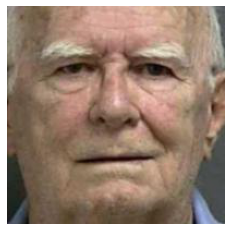

In [ ]:
from PIL import Image
im = Image.open(data_frame['image'][0])
plt.axis('off')
plt.imshow(im);

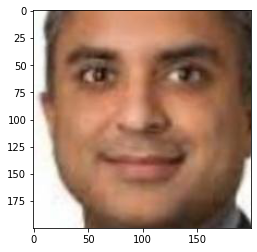

In [ ]:
im2 = Image.open(data_frame['image'][1])
plt.imshow(im2)

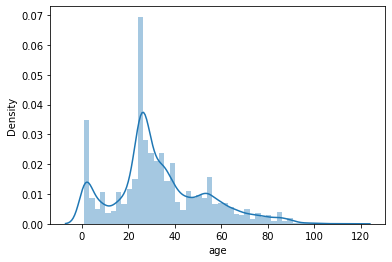

In [ ]:
sns.distplot(data_frame['age'])

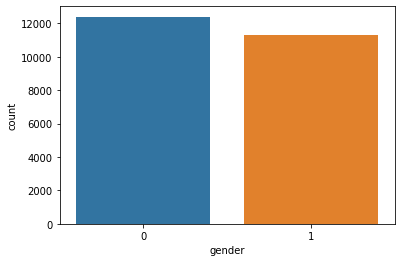

In [ ]:
sns.countplot(data_frame['gender'])

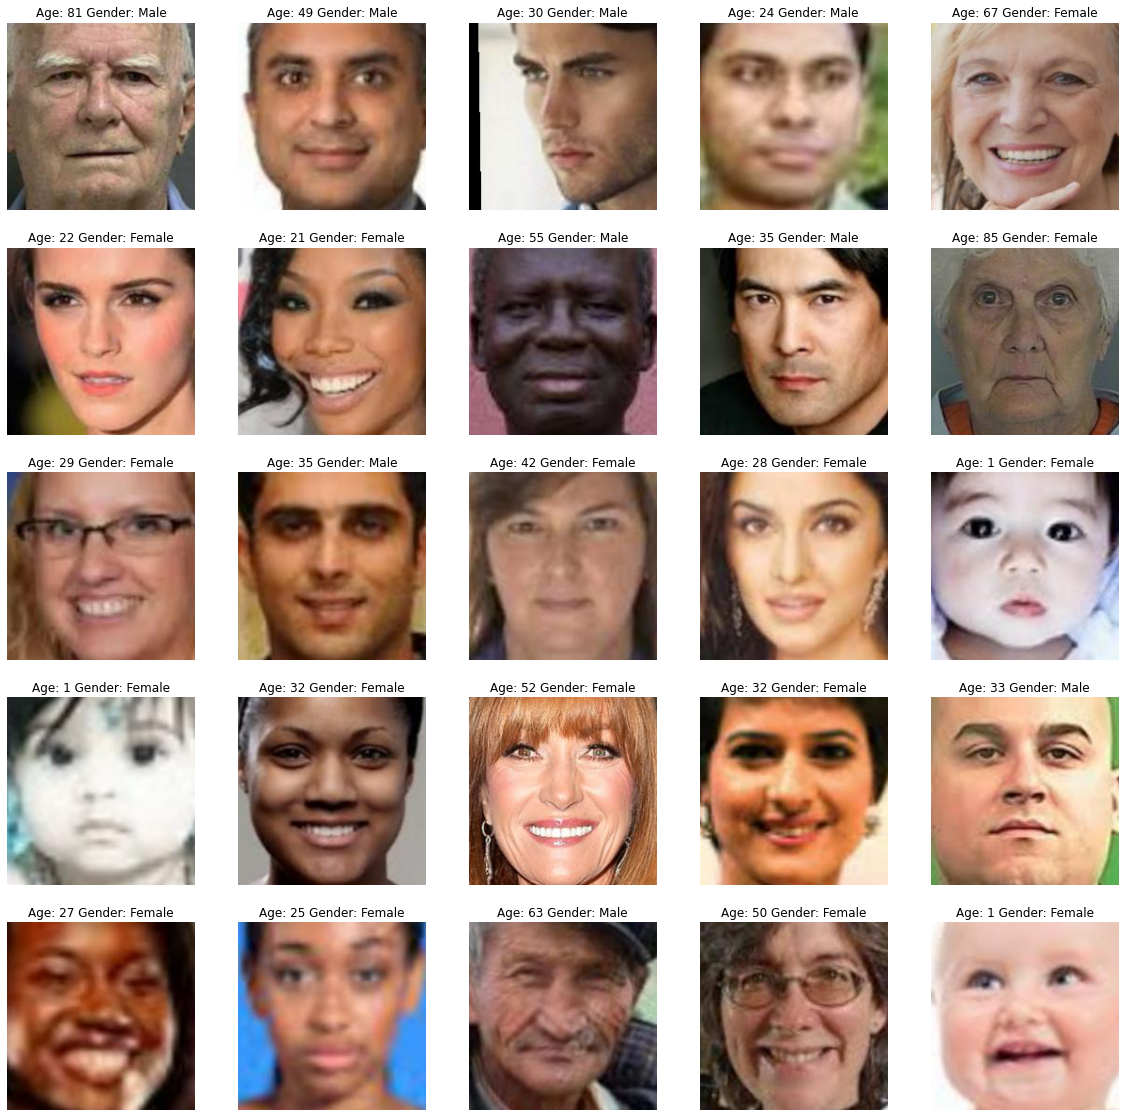

In [ ]:
plt.figure(figsize=(20, 20))
files = data_frame.iloc[0:25]

for index, file, age, gender in files.itertuples(index=True,name='Human'):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(data_frame['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
classes = 101
target = data_frame['age'].values

In [ ]:
print(target)

[81 49 30 ... 34 22 16]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
gender_arr = np.array(data_frame['gender'])
age_arr = np.array(data_frame['age'])

In [ ]:
input_shape = (128,128,1)

In [ ]:
inputs = Input(input_shape)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

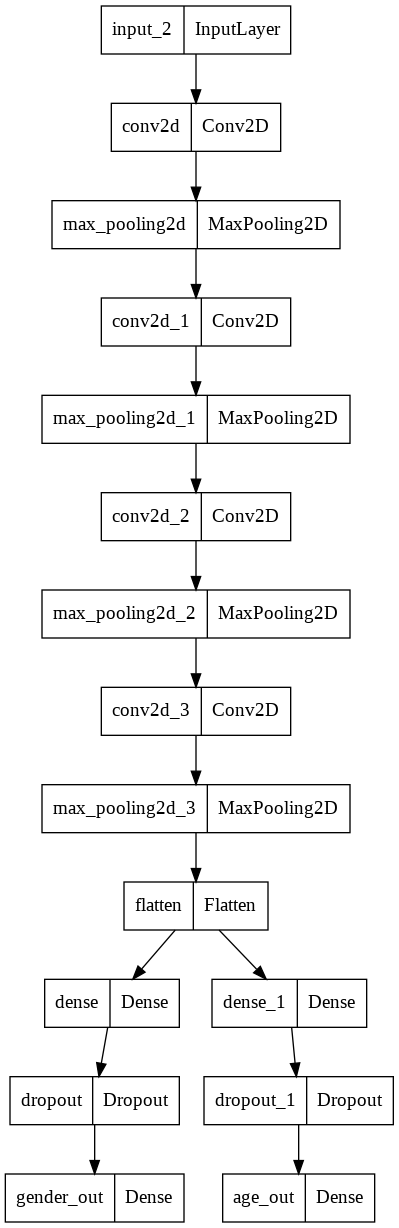

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.save("my_gender_age_model.h5")


In [ ]:
history = model.fit(x=X, y=[gender_arr, age_arr], batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
593/593 [==============================] - 677s 1s/step - loss: 16.0097 - gender_out_loss: 0.6976 - age_out_loss: 15.3121 - gender_out_accuracy: 0.5286 - age_out_accuracy: 0.0475 - val_loss: 14.0812 - val_gender_out_loss: 0.5859 - val_age_out_loss: 13.4953 - val_gender_out_accuracy: 0.7071 - val_age_out_accuracy: 0.0451
Epoch 2/10
593/593 [==============================] - 671s 1s/step - loss: 11.4901 - gender_out_loss: 0.5046 - age_out_loss: 10.9855 - gender_out_accuracy: 0.7564 - age_out_accuracy: 0.0388 - val_loss: 9.9438 - val_gender_out_loss: 0.4186 - val_age_out_loss: 9.5252 - val_gender_out_accuracy: 0.8111 - val_age_out_accuracy: 0.0344
Epoch 3/10
593/593 [==============================] - 666s 1s/step - loss: 9.4901 - gender_out_loss: 0.4132 - age_out_loss: 9.0770 - gender_out_accuracy: 0.8070 - age_out_accuracy: 0.0241 - val_loss: 8.7277 - val_gender_out_loss: 0.3620 - val_age_out_loss: 8.3656 - val_gender_out_accuracy: 0.8323 - val_age_out_accuracy: 0.0108
Epoch 4

[array([[0.99535066]], dtype=float32), array([[46.926754]], dtype=float32)]
Predicted Gender: Female Predicted Age: 47


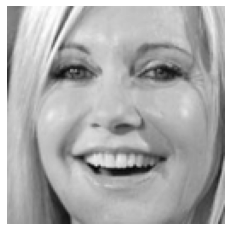

In [ ]:

image_index = 100

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(pred)
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

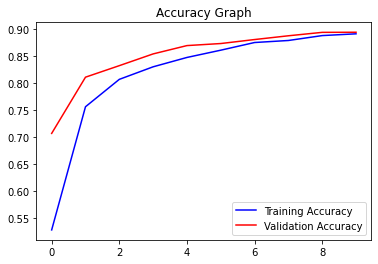

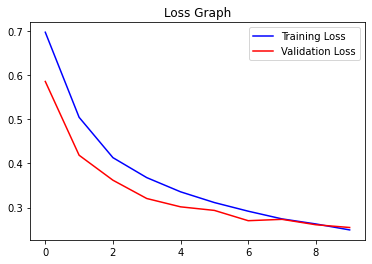

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
import os.path
if os.path.isfile('home/elifsenakuru/Desktop/age_gender_model.h5') is False:
    model.save('home/elifsenakuru/Desktop/age_gender_model.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

[array([[0.9964795]], dtype=float32), array([[27.262266]], dtype=float32)]
Predicted Gender: Female Predicted Age: 27


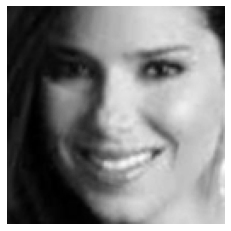

In [ ]:

image_index = 190

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(pred)
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

[array([[0.646501]], dtype=float32), array([[1.9640646]], dtype=float32)]
Predicted Gender: Female Predicted Age: 2


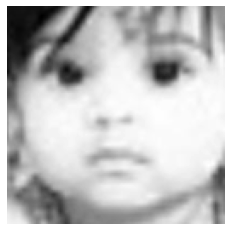

In [ ]:

image_index = 15

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(pred)
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

[array([[0.00181606]], dtype=float32), array([[30.25795]], dtype=float32)]
Predicted Gender: Male Predicted Age: 30


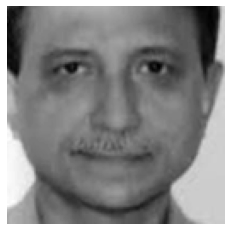

In [ ]:

image_index = 333

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(pred)
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

[array([[0.01230565]], dtype=float32), array([[27.116795]], dtype=float32)]
Predicted Gender: Male Predicted Age: 27


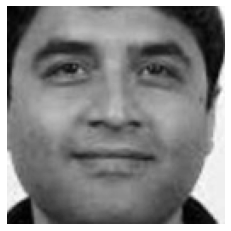

In [ ]:

image_index = 3334

# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(pred)
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');